# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [114]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import ttest_ind
from scipy.stats.stats import pearsonr 
import seaborn as sns

In [66]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [96]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\habsa\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


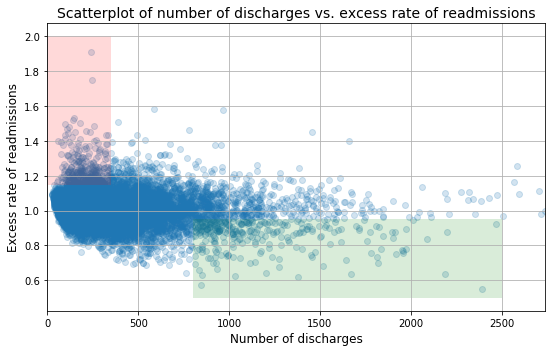

In [70]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Initial observations based on the plot above.
    Overall, rate of readmissions is trending down with increasing number of discharges
Answer: Apparently the graph does show this trend but I wouldn't draw the above conclusion with out further sttatistical analysis. 
    
    With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
Answer: This is true as there are more data points to corroborate this conclusion. Most of the data points are on the left side, lesser capacity,  to coonfirm this behavirour.

    With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)
Answer: This necessarily need not be true because we have very few hospitals with lots of capacity or number of discharges. We need lot more data points to make this coclusion.

### **B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
Answer: Based on the analysis provided below, mean readmission rate is accurate (1.023) but only 59% have readmission rate greater than 1.
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
Answer: Based on the analysis provided below, mean readmission rate is accurate (0.978) and around 44% (44.5)% have readmission rate greater than 1.

In [71]:
disc_less_100=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]
mean_readmsn_ratio=np.mean(disc_less_100['Excess Readmission Ratio'])
readmn_ratio_grtr_1=(len(disc_less_100[disc_less_100['Excess Readmission Ratio']>1])/len(disc_less_100))*100


In [72]:
disc_grt_1000=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]
mean_readmsn_ratio_grt1000=np.mean(disc_grt_1000['Excess Readmission Ratio'])
readmsn_ratio_grtr_1000=(len(disc_grt_1000[disc_grt_1000['Excess Readmission Ratio']>1])/len(disc_grt_1000))*100

In [73]:
print('Hospitals/Facilities with number of discharges < 100, mean excess readmission rate is:{:.3},{:.3}% have excess readmission rate greater than 1'.format(mean_readmsn_ratio,readmn_ratio_grtr_1))

print('Hospitals/Facilities with number of discharges > 1000, mean excess readmission rate is:{:.3},{:.3}% have excess readmission rate greater than 1'.format(mean_readmsn_ratio_grt1000,readmsn_ratio_grtr_1000))

Hospitals/Facilities with number of discharges < 100, mean excess readmission rate is:1.02,59.2% have excess readmission rate greater than 1
Hospitals/Facilities with number of discharges > 1000, mean excess readmission rate is:0.978,44.5% have excess readmission rate greater than 1


### **C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
Answer: From the coorelation analysis and Person cooefficient values identified below, the above statement is correc that there is a strong coorelation between capacity and readmission rates.
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
Answer: The above conclusion may be one of the possibilities but not the only possibility. It's possible that these smaller hospitals can be located in areas which are economically backward and so people lack the means to take care of themselves after they are discharged from the hospital and end up visitinng the hospital again.

In [74]:
np.corrcoef(clean_hospital_read_df['Number of Discharges'],clean_hospital_read_df['Expected Readmission Rate'])

array([[  1.,  nan],
       [ nan,  nan]])

In [75]:
pearsonr(clean_hospital_read_df['Number of Discharges'],clean_hospital_read_df['Expected Readmission Rate'])

C:\Users\habsa\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


(nan, 1.0)

### D. Regulatory policy recommendations
    Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
    Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
    



### Exercise

Include your work on the following in this notebook and submit to your Github account.

A. Do you agree with the above analysis and recommendations? Why or why not?

I agree with the first recommendation that since small capacity hospitals should be required to demonstrate upgraded resource allocation for quality care to continue operation.But the second recommendation to provide incentives to consolidate hospitals and facilities may not work because the problem might be with the location of the fecilities which are in poor neighbourhoods. So improving services may help address the problem to some extent but consolidating fecilities may not have any impact what so ever.


B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

    Setup an appropriate hypothesis test.
Null Hypothesis: Hospital capacity has an affect on the readmission rate(means are not significantly different)

Alternate Hypothesis: Hospital capacity has NO affect on the readmission rate ( Some other characteristic (have an impact on the readmission rate)

    Compute and report the observed significance value (or p-value).
   Observed Significance (or p-value) is 0.0. T-test results:Ttest_indResult(statistic=120.69706190236155, pvalue=0.0)        
    Report statistical significance for αα = .01.Since the observed p-value is way less than αα = .01, we can rejest the hypothesis that hospital capacity has an impact readmission rate.
   
    Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
    Yes they differ. Practical significance considers other factors which might play a role while statistical significance is a pure means game. Statistical Significance does not give a holistic picture.    
    
    Look at the scatterplot above.
        What are the advantages and disadvantages of using this plot to convey information?
     Advantage is thatsummarizing information visually is much more efficient process as the details are hidden. So if the scope is limited to afew variables, plots can be very efficient. On the flip side, graphs or plots can be misleading if there are more variables impacting the process. They don't provide a holistic view in that case.Example here, even though the graph almost shows a direct relationship between capacity and readmission rates, statistical analysis shows a different picture.
     
        Construct another plot that conveys the same information in a more direct manner.


clean_hospital_NoNANs=clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']!=0]
clean_hospital_NoNANs_ND_ERR=clean_hospital_NoNANs[['Number of Discharges','Expected Readmission Rate']]
mean_discharges=np.mean(clean_hospital_read_df['Number of Discharges'])
mean_expected_rate=np.mean(clean_hospital_read_df['Expected Readmission Rate'])
std_discharges=np.std(clean_hospital_read_df['Number of Discharges'])
std_expected_rate=np.std(clean_hospital_read_df['Expected Readmission Rate'])

In [108]:
ttest_ind(clean_hospital_NoNANs_ND_ERR['Number of Discharges'],clean_hospital_NoNANs_ND_ERR['Expected Readmission Rate'])

Ttest_indResult(statistic=120.69706190236155, pvalue=0.0)

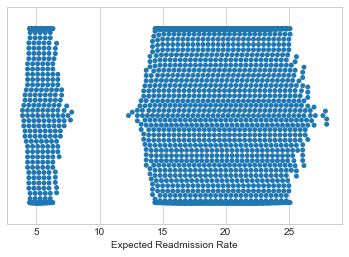

In [128]:
sns.set_style("whitegrid")
sns.swarmplot(clean_hospital_NoNANs_ND_ERR['Expected Readmission Rate'])
plt.show()

In [138]:
clean_hospital_NoNANs_ND_ERR['Expected Readmission Rate']

1832     24.6
1699     22.6
1774     22.3
1853     19.3
1290     20.9
1602     22.1
2048     20.9
2441     19.3
2512     21.8
2825     19.4
3828     25.6
5125     26.8
3312     21.6
2378     18.6
2670     24.2
2944     19.5
1238     17.7
1395     15.1
3145     20.1
3207     22.3
1471     15.1
1838     19.0
4092     23.1
2252     21.5
3087     19.7
4317     22.7
5309     25.3
2952     19.1
3406     20.2
738      22.0
         ... 
7147      5.1
897      22.5
13326     4.5
7872      5.0
9444     22.0
13723     5.1
1605     24.2
12910     4.9
2758      5.2
7934      4.5
1352     22.5
3042     24.1
1448      5.0
2846      5.1
8249     22.5
3202     22.2
13730     4.9
2440     17.3
11545     4.9
1805     22.7
8818     22.5
572      20.4
136       5.9
1698      5.1
1242     19.7
8126      5.3
6643     22.7
1892     22.5
13615     4.8
13666     5.3
Name: Expected Readmission Rate, Length: 11497, dtype: float64

In [131]:
clean_hospital_NoNANs_ND_ERR['Number of Discharges']

1832       25
1699       27
1774       28
1853       29
1290       30
1602       31
2048       33
2441       34
2512       34
2825       34
3828       35
5125       35
3312       35
2378       35
2670       35
2944       35
1238       36
1395       36
3145       37
3207       37
1471       37
1838       37
4092       37
2252       37
3087       37
4317       38
5309       38
2952       38
3406       38
738        39
         ... 
7147     2042
897      2060
13326    2089
7872     2106
9444     2112
13723    2189
1605     2190
12910    2196
2758     2198
7934     2209
1352     2278
3042     2314
1448     2318
2846     2341
8249     2353
3202     2388
13730    2393
2440     2430
11545    2469
1805     2476
8818     2509
572      2565
136      2581
1698     2596
1242     2705
8126     2716
6643     2740
1892     3570
13615    3980
13666    6793
Name: Number of Discharges, Length: 11497, dtype: int32